In [16]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [17]:
data = pd.read_csv('day_length_weight.csv')
x_train = torch.tensor(data.iloc[:, 0:2].to_numpy()).float().reshape(-1, 2)
y_train = torch.tensor(data.iloc[:, 2]).float().reshape(-1, 1)

In [40]:
class LinearRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0], [0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def f(self, x):
        return torch.Tensor(x) @ self.W + self.b

    def loss(self, x, y):
        # return torch.nn.functional.mse_loss(self.f(x), y)
        return np.mean(np.power(self.f(x) - y, 2))


In [38]:
model = LinearRegressionModel()
optimizer = torch.optim.SGD([model.W, model.b], 0.0000001)

for epoch in range(100_000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[0.0039],
        [0.1037]], requires_grad=True), b = tensor([[0.0017]], requires_grad=True), loss = tensor(3.6381, grad_fn=<MseLossBackward0>)


/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


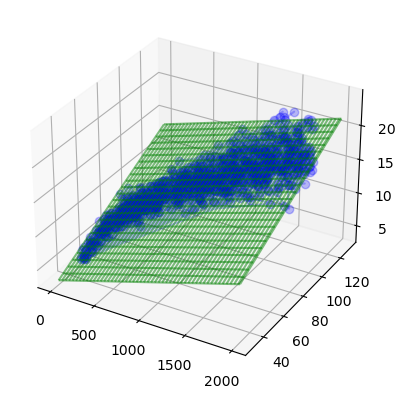

In [41]:
# # Make data.
# X = x_train[:, 0]
# Y = x_train[:, 1]
# Z = y_train

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# ax.scatter(X, Y, Z)

# x = torch.tensor([[torch.min(X)], [torch.max(X)]])
# y = torch.tensor([[torch.min(Y)], [torch.max(Y)]])

# x1_grid, x2_grid = np.meshgrid(x, y)
# y_grid = np.empty([10, 10])
# for i in range(0, x1_grid.shape[0]):
#     for j in range(0, x1_grid.shape[1]):
#         y_grid[i, j] = model.f([[x1_grid[i, j], x2_grid[i, j]]])
# plot1.plot_wireframe(x1_grid, x2_grid, y_grid, color='green')

# plt.plot(x, y, model.f(xy).detach(), label='$\\hat y = f(x) = xW+b$')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()
x_grid, y_grid = np.meshgrid(np.linspace(0, 2000, 100), np.linspace(30, 130, 25))
z_grid = np.empty([25, 100])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# ax.plot_wireframe(np.array([[]]), np.array([[]]), np.array([[]]), color='green')
ax.plot(x_train[:, 0].squeeze(), x_train[:, 1].squeeze(), y_train[:, 0].squeeze(), marker='o', color='blue', alpha=0.25)
# ax.set_xlabel('Age (Days)')
# ax.set_ylabel('Length')
# ax.set_zlabel('Weigth')
# ax.locator_params(nbins=4, axis='x')
# ax.locator_params(nbins=5, axis='x')

for i in range(0, x_grid.shape[0]):
    for j in range(0, x_grid.shape[1]):
        z_grid[i, j] = model.f([[x_grid[i, j], y_grid[i, j]]])
ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.50)

# ax.view_init(elev=28, azim=120)

plt.show()